# Polynomial Regression

## *. Setup

In [ ]:
%pip install numpy pandas matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=4, suppress=True)

## *. Load dataset

In [3]:
M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
T = [3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

In [4]:
data = pd.DataFrame({
    "x_1": M,
    "x_2": T,
    "y": L,
})

## 1. Dataset visualization

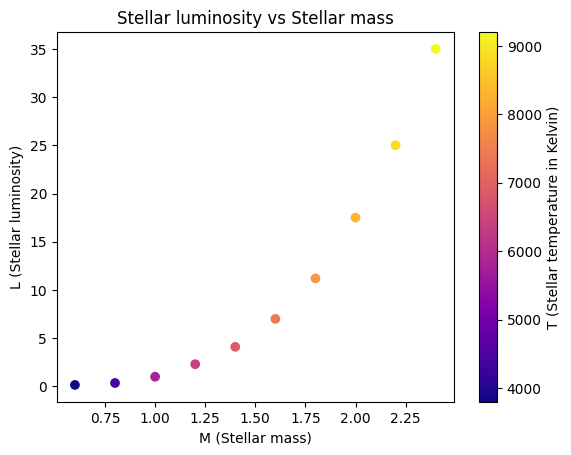

In [5]:
plt.figure()
scatter = plt.scatter(data["x_1"], data["y"],
            c=data["x_2"], cmap="plasma")
plt.xlabel("M (Stellar mass)")
plt.ylabel("L (Stellar luminosity)")
plt.title("Stellar luminosity vs Stellar mass")
plt.colorbar(scatter, label="T (Stellar temperature in Kelvin)")
plt.show()

## 2. Feature engineering

In [6]:
M = data["x_1"].to_numpy()
T = data["x_2"].to_numpy()

X = np.column_stack((
    M,
    T,
    M**2,
    M * T
))

y = data["y"].to_numpy()

## 3. Loss and gradients

In [7]:
def predict (X, w, b):
    return X @ w + b

### 3.1 Cost function

In [8]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

# Test with w = 0, b = 0
n = X.shape[1]
w_test = np.zeros(n)
b_test = 0.0
print("Cost with w=0, b=0:", compute_cost(X, y, w_test, b_test))

Cost with w=0, b=0: 117.69675


### 3.2 Gradient of the cost function

In [9]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradient(X, y, w_test, b_test)
print("Gradient at w=0, b=0:")
print("dj_dw:", dj_dw_test)
print("dj_db:", dj_db_test)

Gradient at w=0, b=0:
dj_dw: [    -21.523   -87845.         -45.9434 -185408.8   ]
dj_db: -10.36


## 4. Gradient descent + convergence

In [10]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    """Run gradient descent to learn w and b.

    Parameters
    ----------
    X : np.ndarray, shape (m, n)
    y : np.ndarray, shape (m,)
    w_init : np.ndarray, shape (n,)
    b_init : float
    alpha : float
        Learning rate.
    num_iterations : int

    Returns
    -------
    w : np.ndarray, shape (n,)
    b : float
    history_it : list of int
    history_cost : list of float
    """
    w = w_init.copy()
    b = b_init
    history_it = []
    history_cost = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i % 50 == 0 or i == num_iterations - 1:
            cost = compute_cost(X, y, w, b)
            history_it.append(i)
            history_cost.append(cost)
            print(f"Iteration {i:4d}: cost = {cost:8.4f}")

    return w, b, history_it, history_cost

alpha = 1e-10
num_iterations = 8000
w_init = np.zeros(n)
b_init = 0.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: cost = 113.5327
Iteration   50: cost =  30.3897
Iteration  100: cost =  20.5753
Iteration  150: cost =  19.0546
Iteration  200: cost =  18.4829
Iteration  250: cost =  18.0304
Iteration  300: cost =  17.6030
Iteration  350: cost =  17.1898
Iteration  400: cost =  16.7892
Iteration  450: cost =  16.4007
Iteration  500: cost =  16.0238
Iteration  550: cost =  15.6584
Iteration  600: cost =  15.3039
Iteration  650: cost =  14.9601
Iteration  700: cost =  14.6267
Iteration  750: cost =  14.3033
Iteration  800: cost =  13.9896
Iteration  850: cost =  13.6854
Iteration  900: cost =  13.3904
Iteration  950: cost =  13.1042
Iteration 1000: cost =  12.8267
Iteration 1050: cost =  12.5575
Iteration 1100: cost =  12.2964
Iteration 1150: cost =  12.0432
Iteration 1200: cost =  11.7976
Iteration 1250: cost =  11.5594
Iteration 1300: cost =  11.3284
Iteration 1350: cost =  11.1043
Iteration 1400: cost =  10.8870
Iteration 1450: cost =  10.6763
Iteration 1500: cost =  10.4718
Iteratio

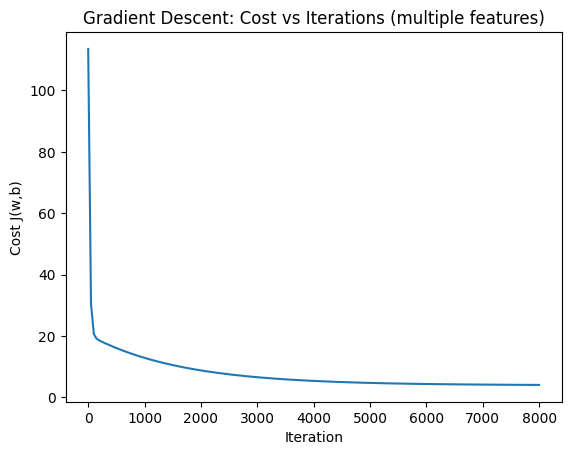

In [11]:
plt.figure()
plt.plot(it_hist, cost_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations (multiple features)")
plt.show()

## 5. Feature selection experiment


Model M1:
Final cost: 41.164522042786274
Learned parameters: [0.     0.0017] b: -1.0781855121483304e-06


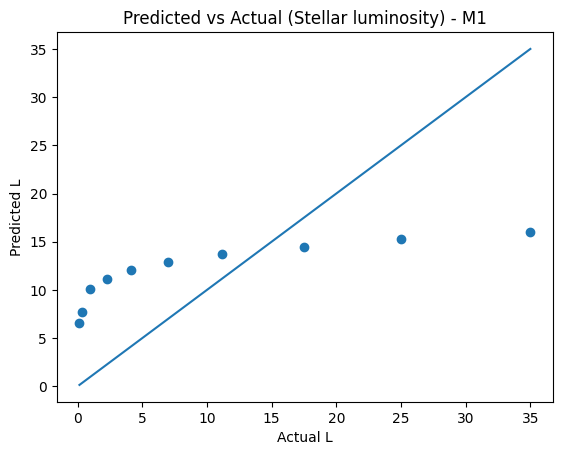


Model M2:
Final cost: 41.16443423800994
Learned parameters: [0.     0.0017 0.    ] b: -1.0781851002822228e-06


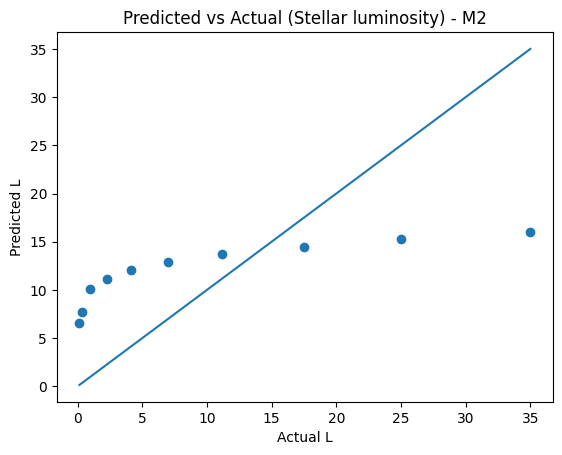


Model M3:
Final cost: 4.012244433877304
Learned parameters: [-0.     -0.0022  0.      0.0023] b: -4.785593382359814e-07


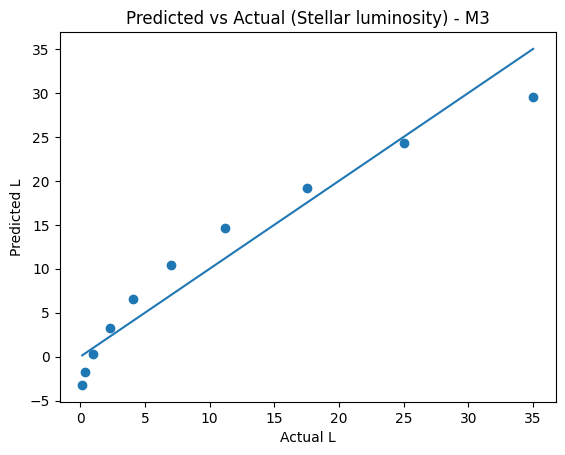

In [12]:
M = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
T = np.array([3800, 4400, 5800, 6400, 6900, 7400, 7900, 8300, 8800, 9200])
L = np.array([0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0])

def predict(X, w, b):
    return X @ w + b

def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y
    cost = (error @ error) / (2 * m)
    return cost

def compute_gradient(X, y, w, b):
    m = X.shape[0]
    y_hat = predict(X, w, b)
    error = y_hat - y

    dj_dw = (X.T @ error) / m
    dj_db = np.sum(error) / m
    return dj_dw, dj_db

def gradient_descent(X, y, w_init, b_init, alpha, num_iterations):
    w = w_init.copy()
    b = b_init
    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
    return w, b


models = {
    "M1": np.column_stack((M, T)),
    "M2": np.column_stack((M, T, M**2)),
    "M3": np.column_stack((M, T, M**2, M*T))
}

alpha = 1e-10
num_iterations = 8000

for name, X in models.items():
    n = X.shape[1]
    w_init = np.zeros(n)
    b_init = 0.0

    w_learned, b_learned = gradient_descent(X, y, w_init, b_init, alpha, num_iterations)

    y_pred = predict(X, w_learned, b_learned)

    final_cost = compute_cost(X, y, w_learned, b_learned)

    print(f"\nModel {name}:")
    print("Final cost:", final_cost)
    print("Learned parameters:", w_learned, "b:", b_learned)

    plt.figure()
    plt.scatter(y, y_pred)
    plt.plot([min(y), max(y)], [min(y), max(y)])
    plt.xlabel("Actual L")
    plt.ylabel("Predicted L")
    plt.title(f"Predicted vs Actual (Stellar luminosity) - {name}")
    plt.show()

## 6. Cost vs interaction

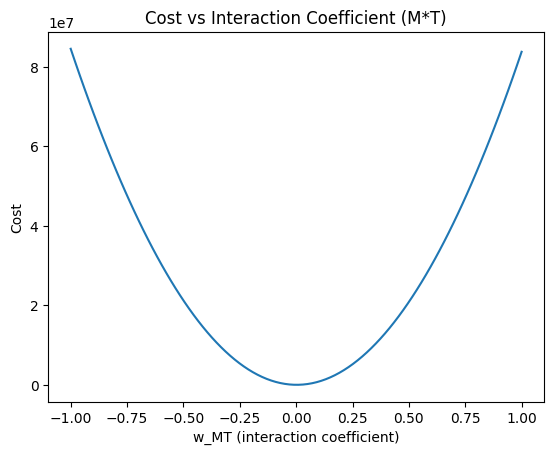

In [13]:
idx_MT = 3  #[M, T, M^2, M*T]

w_MT_values = np.linspace(-1.0, 1.0, 100)  

cost_values = []

for w_MT in w_MT_values:
    w_test = w_learned.copy()
    w_test[idx_MT] = w_MT
    cost = compute_cost(X, y, w_test, b_learned)
    cost_values.append(cost)

plt.figure()
plt.plot(w_MT_values, cost_values)
plt.xlabel("w_MT (interaction coefficient)")
plt.ylabel("Cost")
plt.title("Cost vs Interaction Coefficient (M*T)")
plt.show()

The cost curve versus the interaction coefficient $ w_{MT} $ shows a minimum around zero, indicating that the interaction term does not improve the model. Modifying this coefficient to values far from zero results in a rapid increase in the error, suggesting that the interaction is not relevant for predicting luminosity in this case.

## 7. Inference demo

In [14]:
M_new = 1.3
T_new = 6600

In [15]:
X_new = np.array([M_new, T_new, M_new**2, M_new*T_new]).reshape(1, -1)

y_pred = predict(X_new, w_learned, b_learned)

print(f"Predicted luminosity L for M={M_new}, T={T_new}: {y_pred[0]:.2f}")

Predicted luminosity L for M=1.3, T=6600: 4.83


This value appears reasonable given the trend observed in the training data, where luminosity increases with both mass and temperature. Therefore, the model's prediction aligns well with physical expectations for stellar luminosity.